In [1]:
import sys

In [2]:
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt

In [3]:
sys.path.append("../../")

In [34]:
%load_ext autoreload
%autoreload 2

from adj_matrix.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Base de datos Caviar

Caviar se refiere a una investigación criminal coordinada por autoridades de Canadá durante los años 1994 a 1996. El objetivo de esta investigación era entender las interacciones entre los distintos criminales que operaban en Canadá. Durante el periodo de dos años, las autoridades canadienses intervinieron 11 veces las comunicaciones de los criminales para entender como se relacionaban. Se generó un conjunto de datos distinto con cada una de estas intervenciones.

Los datos de esta investigación permiten analizar los cambios en la red de criminales a través del tiempo y el cambio de circunstancias. Se dio seguimiento a un total de 110 criminales, de los cuales 82 eran traficantes de drogas y 28 no traficantes.

Comenzamos descargando la base de datos

In [5]:
phases, G = download_caviar_data()

### Entendiendo la matriz de adyacencia

Ahora examinamos un poco más como está configurada la matriz de adyacencia con la que estaremos trabajando en este análisis. Dado que se trata de un caso **no dirigido**, se tienen 11 matrices **simétricas de adyacencia**. Cada matriz relaciona al grupo de criminales con base en interacciones entre ellos.

Tomamos como ejemplo la 1ra matriz de adyacencia de las 11 disponibles:

In [6]:
phases[1]

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8
n1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
n4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
n83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
n3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
n5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
n85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
n90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Primera exploración de las redes a través del tiempo

Comenzamos explorando las matrices de adyacencia y como estas fueron evolucionando a lo largo de los 11 cortes de tiempo (intervenciones). A continuación se presenta una gráfica con la evolución del conteo del número de nódos y conexiones.

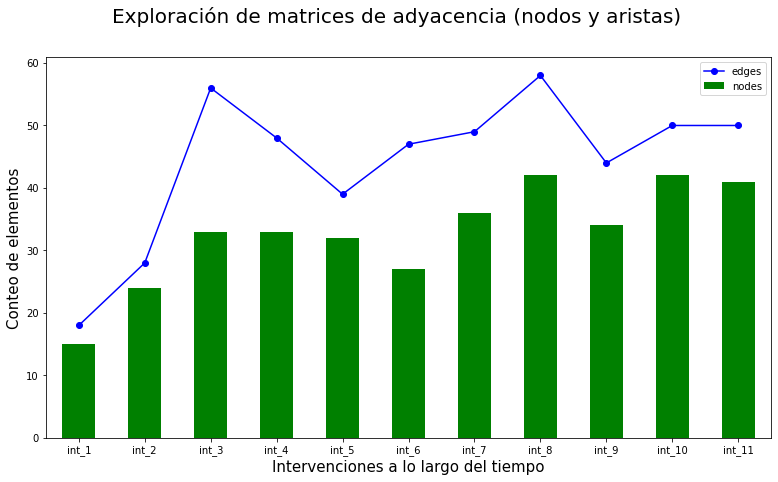

In [7]:
adys_in_time_plot(G)

Los registros de las autoridades indican que hay 4 fases importantes en las que podemos clasificar cada una de las 11 intervenciones. A continuación enlistaremos los sucesos más importantes de cada fase, así como atributos presentes en la gráfica de *Exploración de matrices de adyacencia (nodos y aristas)* que los sustentan:

- **Fase 1: crecimiento de la red (intervenciones 1-3)**
    - Sucesos más importantes en registros:
        - En esta fase las autoridades recabaron información de la red por primera vez.
        - Las autoridades no intervinieron con la red.
    - Observaciones en la gráfica:
        - Vemos un crecimiento importante, tanto en el número de nodos (de 15 a 33), como en el número de aristas (de 18 a 56).
        

- **Fase 2: decomisión y cambio de actividades (intervenciones 4-5)**
    - Sucesos más importantes en registros:
        - Se hace la primera decomisión de drogas a la red criminal.
        - Las autoridades implementan medidas para dificultar la operación de la red.
        - Ingresa a la red un traficante colombiano que juega un papel importante en la red.
    - Observaciones en la gráfica:
        - La red solamente pierde 1 nodo, pero sus conexiones bajan drasticamente (de 56 a 3)
        

- **Fase 3: reestructuración (intervenciones 6)**
    - Sucesos más importantes en registros:
        - La red criminal se reorganiza ante la entrada del participante colombiano.
    - Observaciones en la gráfica:
        - El número de nodos baja considerablemente (de 32 a 27), pero las conexiones aumentan (de 39 a 37)
        

- **Fase 4: red bajo estrés (intervenciones 7-11)**
    - Sucesos más importantes en registros:
        - Las autoridades realizan varias decomisiones de drogas a la red criminal.
        - Se implementan varias acciones por parte de las autoridades que obstaculizan la operación de la red.
    - Observaciones en la gráfica:
        - Se observa variabilidad en el número de nodos y aristas de la red en esta fase.

### Representación gráfica de las redes a lo largo del tiempo

Ya con una idea más clara de lo que sucedió con la red de criminales a lo largo del tiempo, generamos visualizaciones de la red en todos los momentos del tiempo:

#### Fase 1

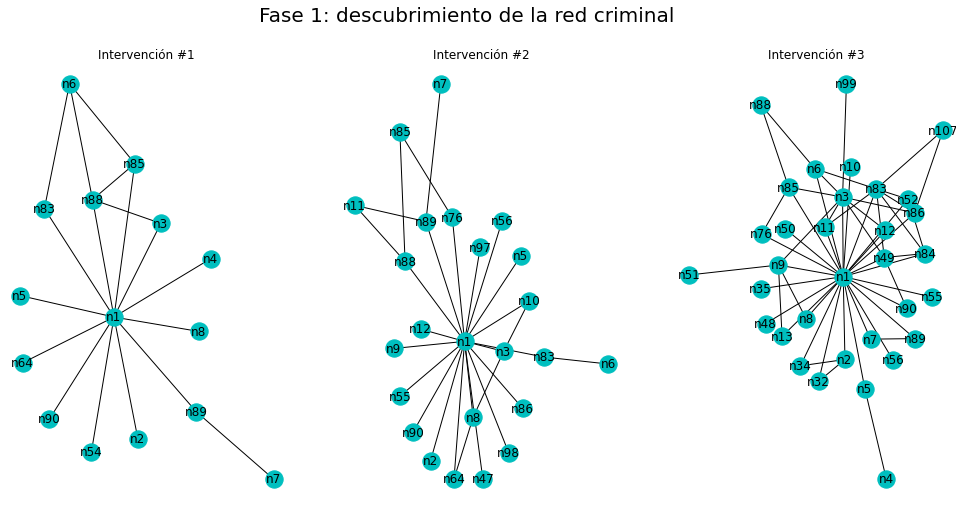

In [16]:
create_fase_nxs(G, range(1, 4), 0, "Fase 1: descubrimiento de la red criminal", "c")

#### Fase 2

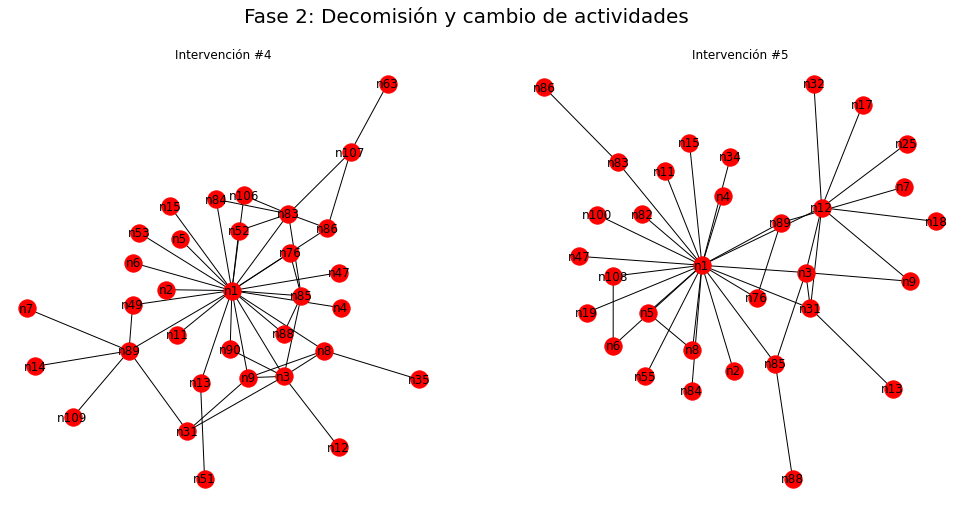

In [17]:
create_fase_nxs(G, range(1, 3), 3, "Fase 2: Decomisión y cambio de actividades", "r")

#### Fase 3

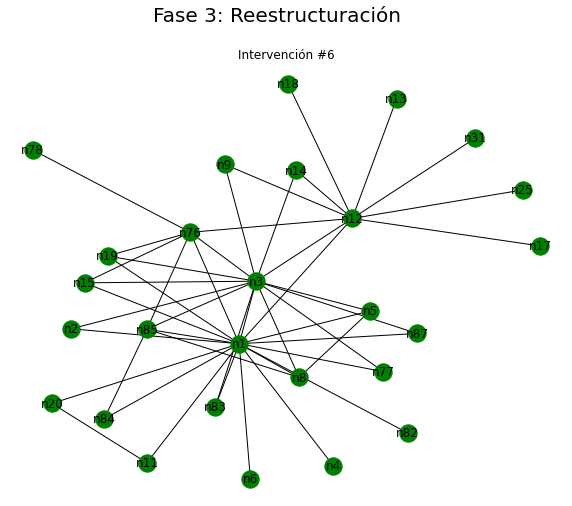

In [18]:
create_fase_nxs(G, range(1, 2), 5, "Fase 3: Reestructuración", "g")

#### Fase 4

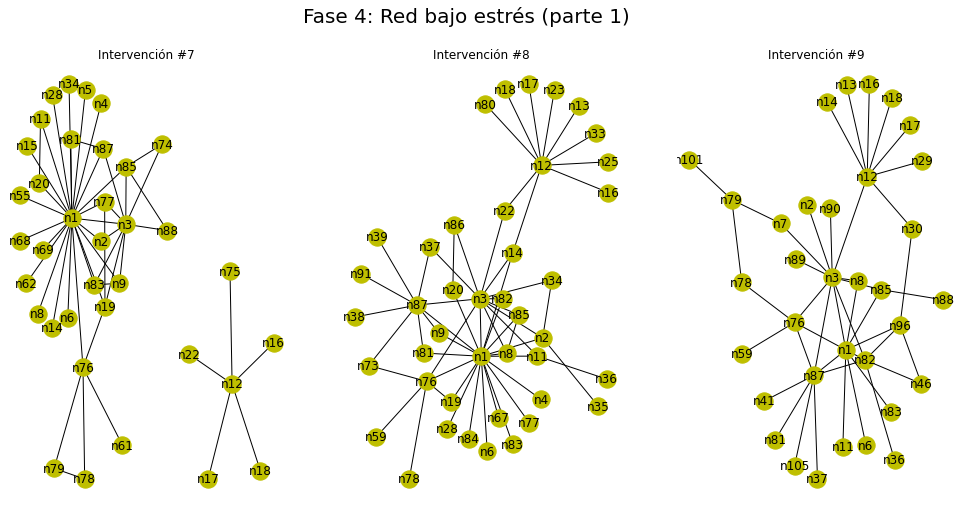

In [19]:
create_fase_nxs(G, range(1, 4), 6, "Fase 4: Red bajo estrés (parte 1)", "y")

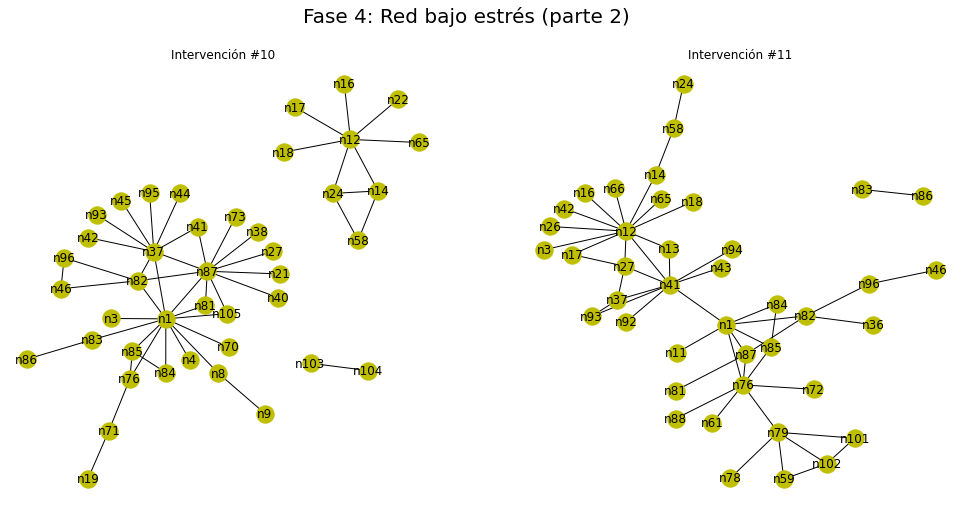

In [20]:
create_fase_nxs(G, range(1, 3), 9, "Fase 4: Red bajo estrés (parte 2)", "y")

### Profundización en el análisis de las redes en el tiempo

Ahora que tenemos una idea más clara de la red criminal y su evolución a lo largo del tiempo, continuaremos con un análisis más profundo de esta apoyándonos de la *teoría de redes*.

Con el fin de simplificar el análisis, optamos por hacer una selección de 5 redes que consideramos representativas de cada una de las fases mencionadas. A continuación presentamos las 5 intervenciones seleccionadas:

- **Fase 1: crecimiento de la red (intervenciones 1-3)**
    - Intervención #2

- **Fase 2: decomisión y cambio de actividades (intervenciones 4-5)**
    - Intervención #5

- **Fase 3: reestructuración (intervenciones 6)**
    - Intervención #6

- **Fase 4: red bajo estrés (intervenciones 7-11)**
    - Intervención #8
    - Intervención #10

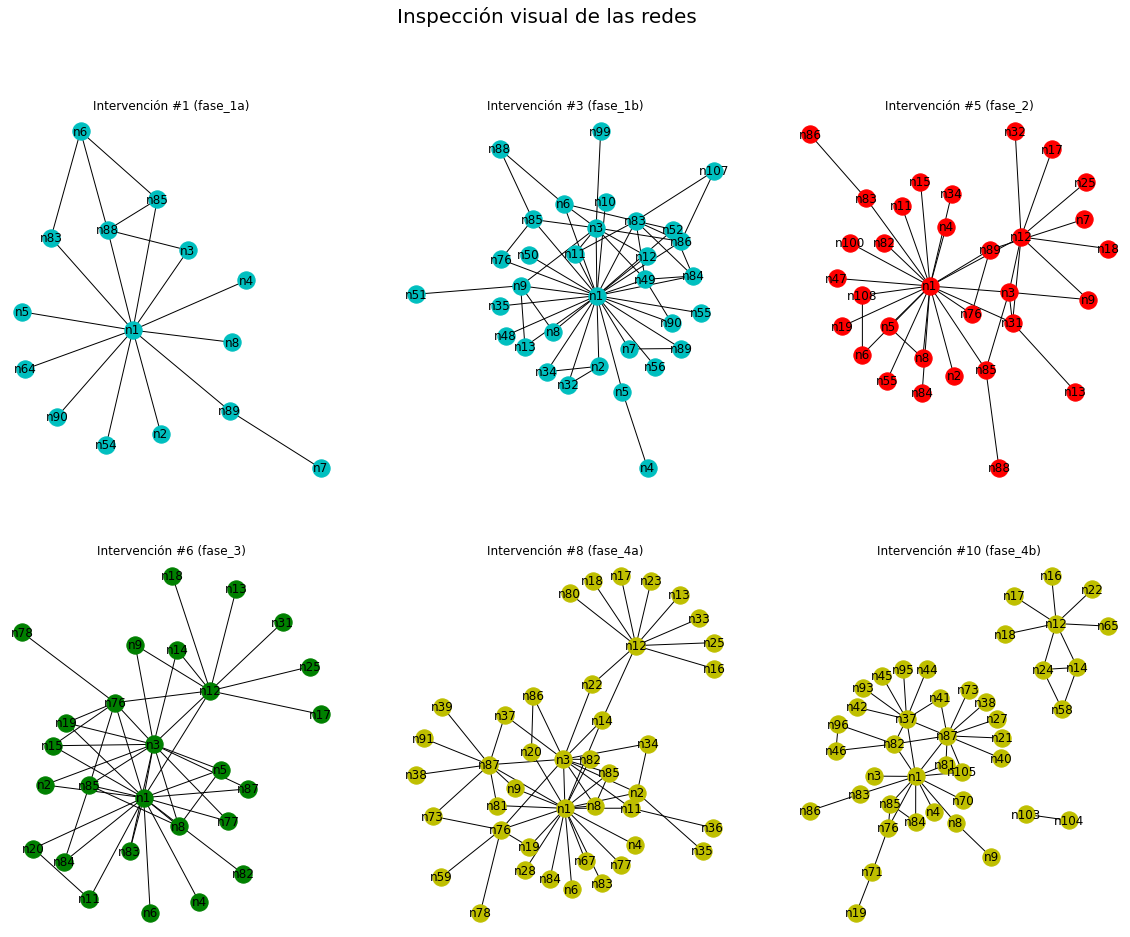

In [24]:
networks_deep_analysis(G, nums_cols, "visual")

Con base en esta primera exploración, notamos lo siguiente:

- En la mayoría de las intervenciones observamos que solo hay una gran red de criminales que no está seccionada. Solamente en algunos casos (e.g. Intervención #10 de la Fase 4) vemos que se crean nuevas redes que operan de forma independiente.

- El criminal representado por el nodo *n1* (Daniel Serero) juega un rol central en la red.

- A partir de la Fase 2, el criminal representado por el nodo *n12* comienza a jugar un papel más importante en la red criminal.

#### Médidas de centralidad

**Grado**

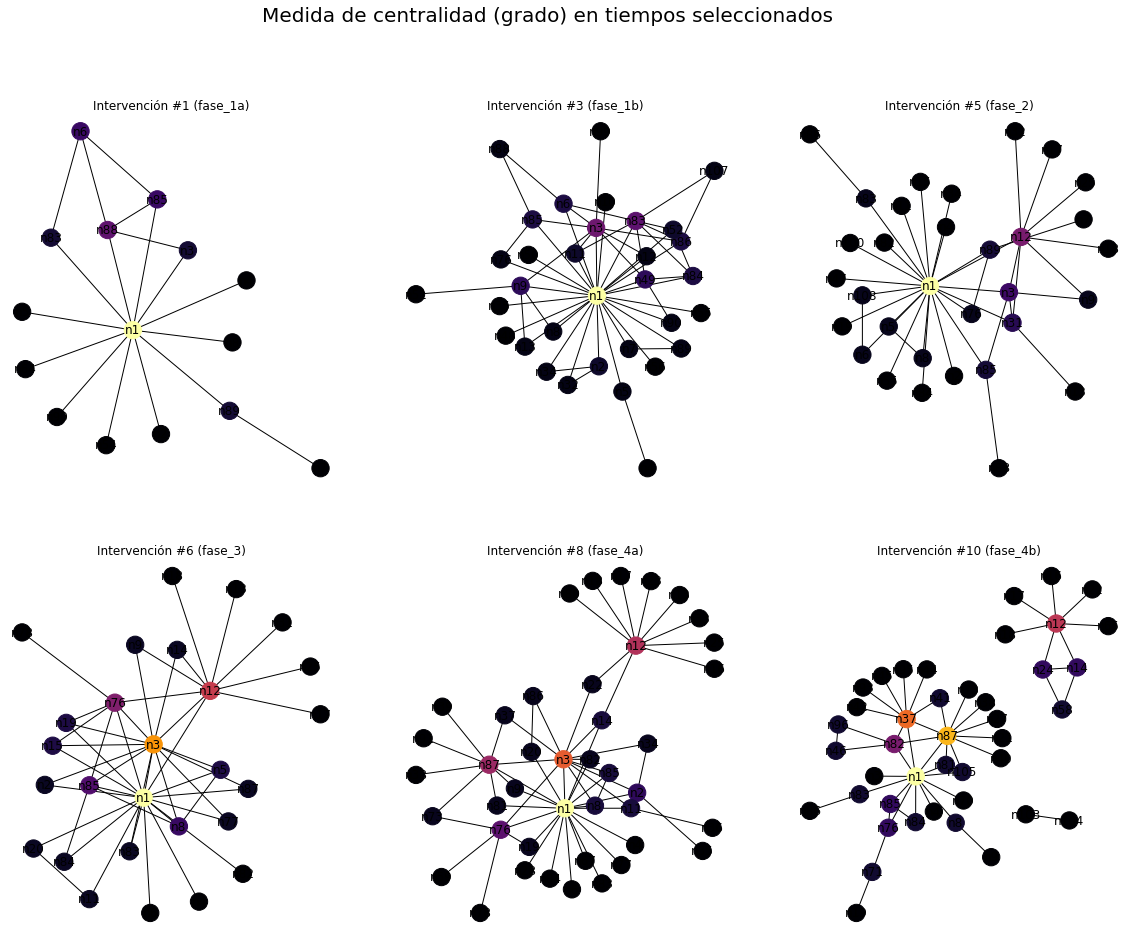

In [95]:
networks_deep_analysis(G, nums_cols, "grado")

Explicación...

**Intermediación**

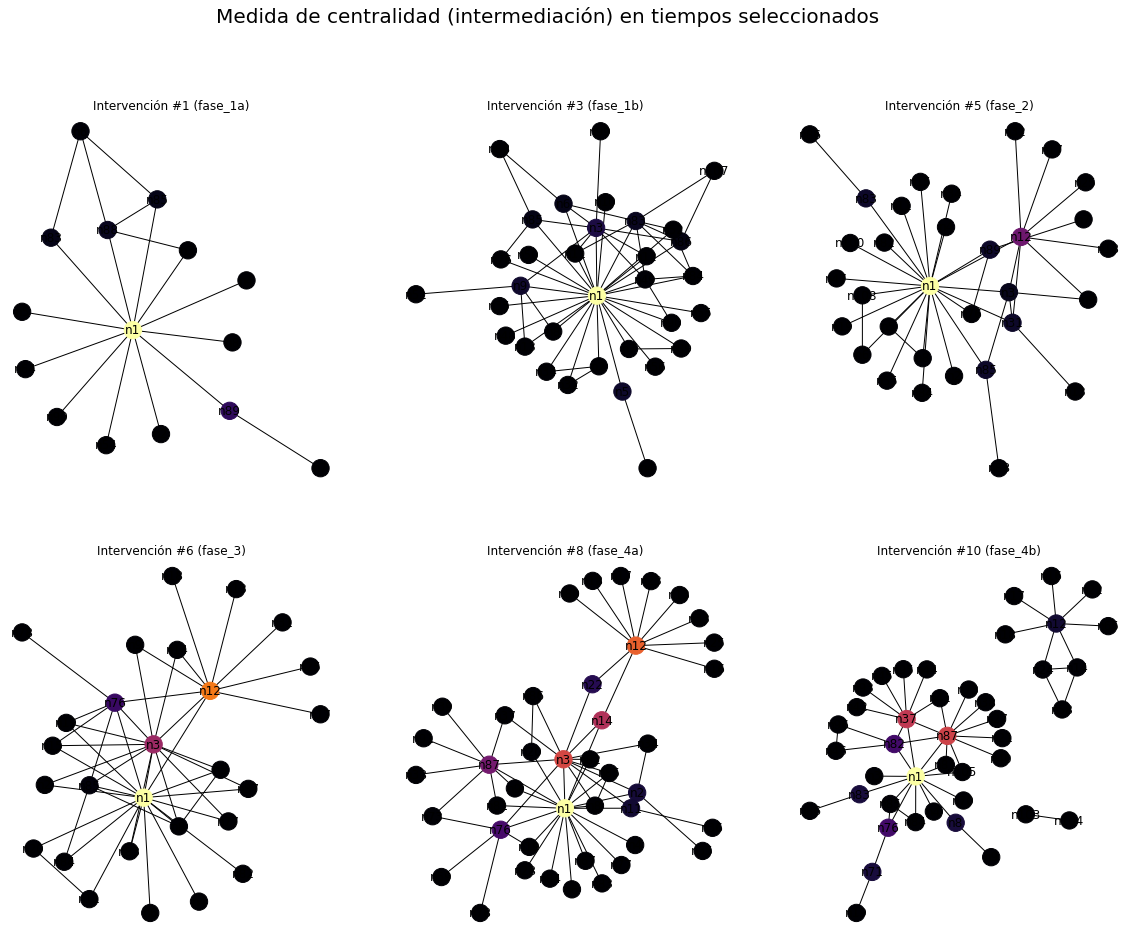

In [26]:
networks_deep_analysis(G, nums_cols, "intermediación")

Explicación...

In [36]:
df_centrality_metrics_periods(G, "intermediación")

Calculo de métrica de centralidad (intermediación) para todas las intervenciones


,1,2,3,4,5,6,7,8,9,10,11
1,"(n1, 0.91)","(n1, 0.94)","(n1, 0.83)","(n1, 0.84)","(n1, 0.88)","(n1, 0.54)","(n1, 0.59)","(n1, 0.55)","(n3, 0.58)","(n1, 0.34)","(n41, 0.55)"
2,"(n89, 0.14)","(n89, 0.12)","(n3, 0.1)","(n89, 0.2)","(n12, 0.27)","(n12, 0.38)","(n76, 0.13)","(n12, 0.36)","(n12, 0.36)","(n87, 0.19)","(n1, 0.53)"
3,"(n88, 0.05)","(n83, 0.09)","(n9, 0.07)","(n3, 0.09)","(n89, 0.06)","(n3, 0.23)","(n3, 0.07)","(n3, 0.31)","(n1, 0.25)","(n37, 0.17)","(n12, 0.43)"


In [37]:
df_centrality_metrics_mean(G, "intermediación")

Promedio de métrica de centralidad (intermediación) para todas las intervenciones


,mean
n1,0.65
n12,0.17
n3,0.13
n76,0.08
n87,0.06


**Eigenvector**

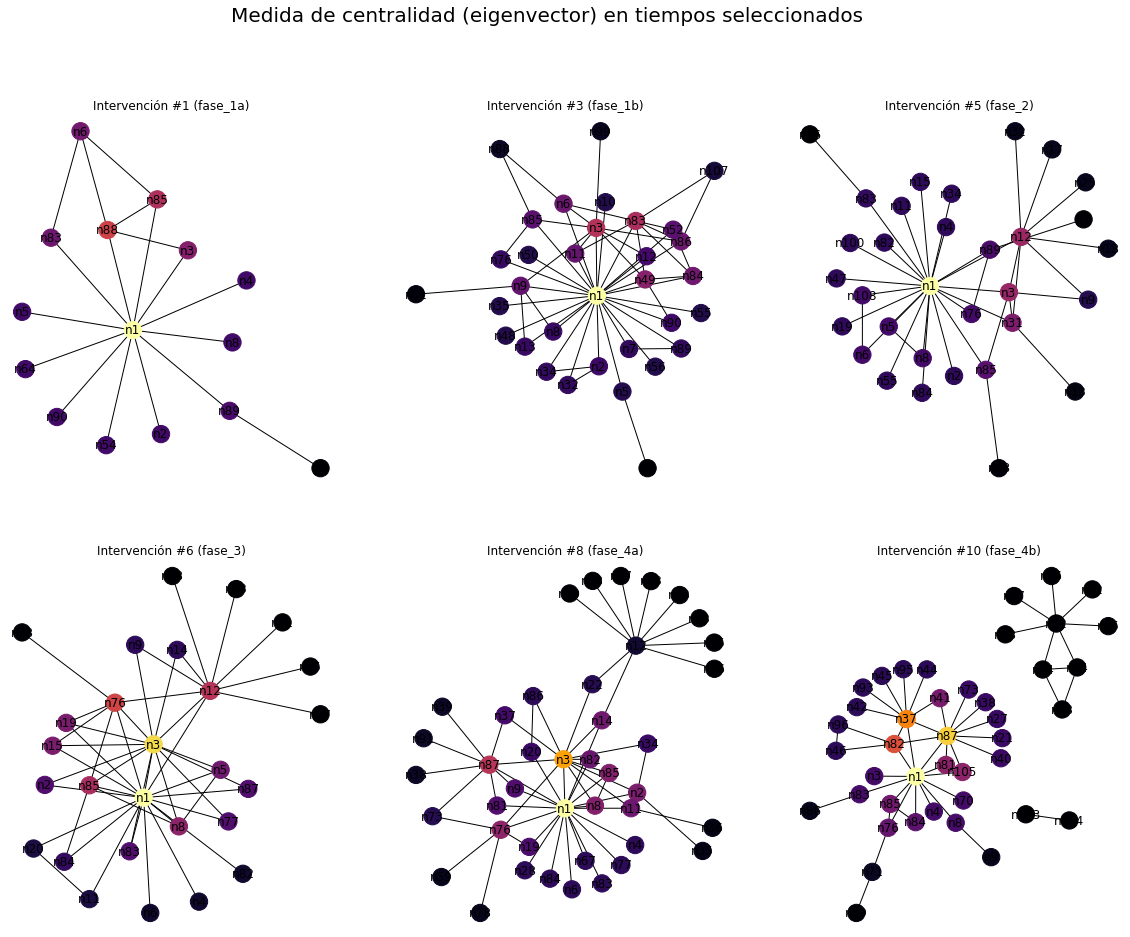

In [102]:
networks_deep_analysis(G, nums_cols, "eigenvector")

Explicación...

In [32]:
df_centrality_metrics_periods(G, "eigenvector")

Calculo de métrica de centralidad (eigenvector) para todas las intervenciones


,1,2,3,4,5,6,7,8,9,10,11
1,"(n1, 0.63)","(n1, 0.67)","(n1, 0.59)","(n1, 0.61)","(n1, 0.64)","(n1, 0.5)","(n1, 0.6)","(n1, 0.54)","(n3, 0.47)","(n1, 0.51)","(n12, 0.49)"
2,"(n88, 0.36)","(n8, 0.24)","(n3, 0.29)","(n3, 0.27)","(n12, 0.28)","(n3, 0.45)","(n3, 0.37)","(n3, 0.43)","(n1, 0.46)","(n87, 0.45)","(n41, 0.46)"
3,"(n85, 0.31)","(n3, 0.24)","(n83, 0.28)","(n83, 0.27)","(n3, 0.28)","(n76, 0.3)","(n19, 0.23)","(n87, 0.27)","(n87, 0.37)","(n37, 0.37)","(n27, 0.32)"


In [35]:
df_centrality_metrics_mean(G, "eigenvector")

Promedio de métrica de centralidad (eigenvector) para todas las intervenciones


,mean
n1,0.55
n3,0.30
n85,0.19
n76,0.17
n8,0.15


#### Detección de comunidades

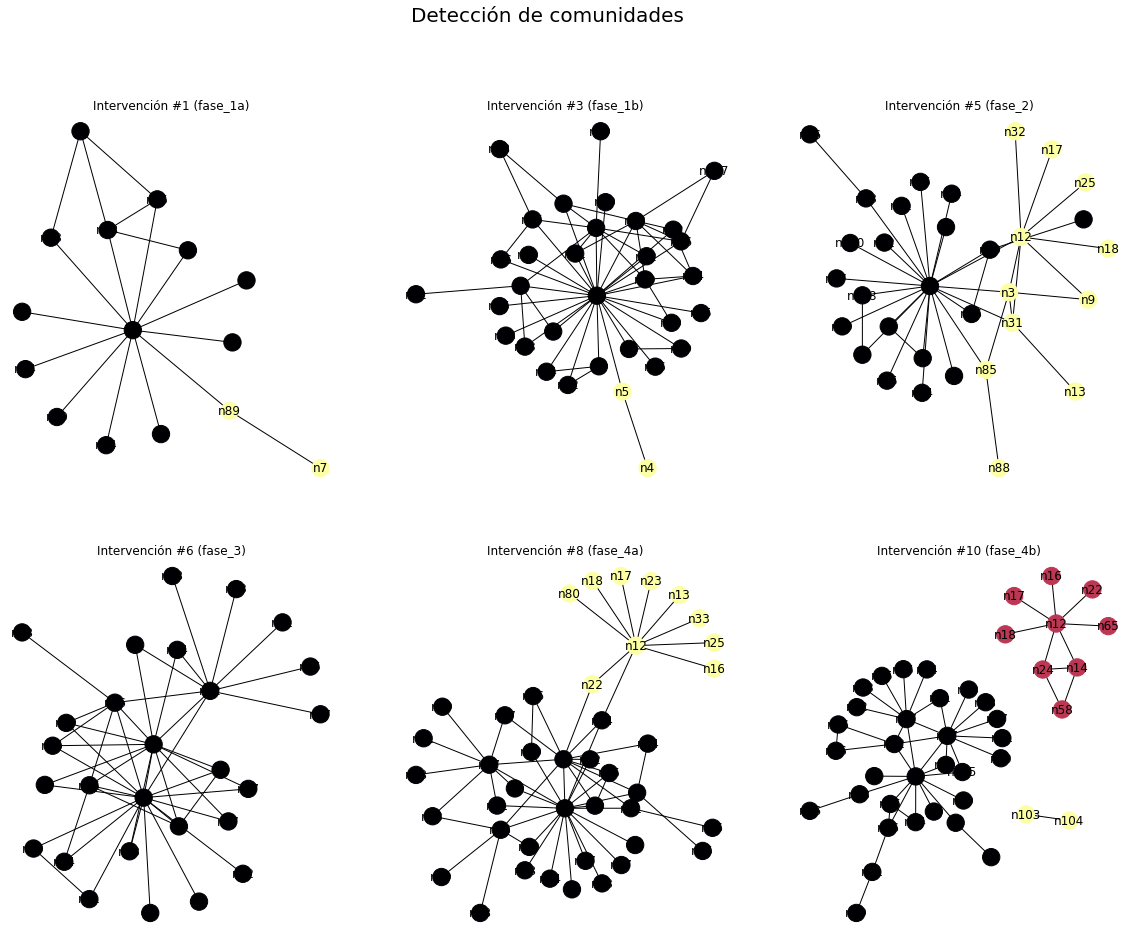

In [29]:
networks_deep_analysis(G, nums_cols, "comunidades")

Explicación...

#### Conclusiones

Explicación...